In [7]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Manager, Pool, Process
from collections import *  # módulo counter para contar o número de elmentos
from math import *
from scipy import stats

## Função que realiza o log binning

In [92]:
#data: conectividade (lista com grau de cada sítio)
#N: número de bins;

#return: k_médio e pk_médio (binados)

def log_binning(data, N):
    # Realizando a binagem
    
    # Razão da PG dos termos
    q = (max(data) / min(data)) ** (1 / (N - 1))

    # Bins em potencia de 2------------------
    bins = [q ** i for i in range(N)]

    # K separado em cada caixa-----------------
    k_bin = [[] for i in np.repeat(None, N)]

    for i in range(len(data)):
        m = int(np.log(data[i]) / np.log(q))
        k_bin[m].append(data[i])

    # Removendo as listas vazias e o bins que não possuem elemento em sua bin
    for i in range(len(k_bin)):
        for index, elements in enumerate(k_bin):
            if len(elements) == 0:
                del k_bin[index]
                del bins[index]
    
    # Largura dos espaçamentos dos bins
    Bins = np.array(bins)
    widths = (Bins[1:] - Bins[:-1])
    
    # Calculando o valor de k_médio--------------------------------------
    
    # Conta os valores únicos de k
    k = list(list(Counter(k_bin[i]).keys()) for i in range(len(k_bin)))
    
    # Conta o o número de vezes que os valores únicos de k aparecem
    Nk = list(list(Counter(k_bin[i]).values()) for i in range(len(k_bin)))

    # Guardará o k médio
    k_avarage = []
    
    # Loop inicia no comprimento de k (número de bins)
    for i in range(len(k)):
        # Valor inicial da soma para média e reset do termo da média
        Sum = 0

        # Pega o comprimento da lista dentro da lista de k
        for j in range(len(k[i])):
            # Calculo dos termos da média
            Sum += k[i][j] * Nk[i][j] / sum(Nk[i])
        # Add a média de k_i no array k_avarage_i
        k_avarage.append(Sum)
    # Pegando o ponto médio de k_avarage;
    K_avarage = [(k_avarage[i+1]+k_avarage[i])/2 for i in range(len(k_avarage)-1)]
    
    # Calculando o valor de pk_médio---------------------------
    
    # Conta o o número de vezes que os valores únicos de k aparecem
    nk = list(sum(list(Counter(k_bin[i]).values())) for i in range(len(k_bin)))
    # Número de sítios na rede
    N = sum([len(k_bin[i]) for i in range(len(k_bin))])
    
    # Calculando pk_medio em k_médio;
    
    pk = [(nk[i+1]+nk[i]/2) / (widths[i] * N) for i in range(len(nk)-1)]
    
    return K_avarage, pk

In [100]:
k_ava, pk = log_binning(data, 90)

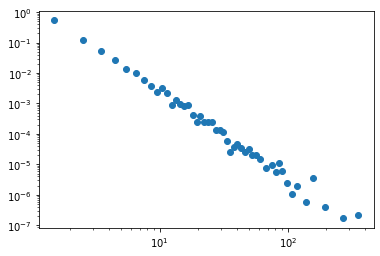

In [101]:
plt.plot(k_ava,pk,'o')
plt.xscale('log')
plt.yscale('log')
plt.show()